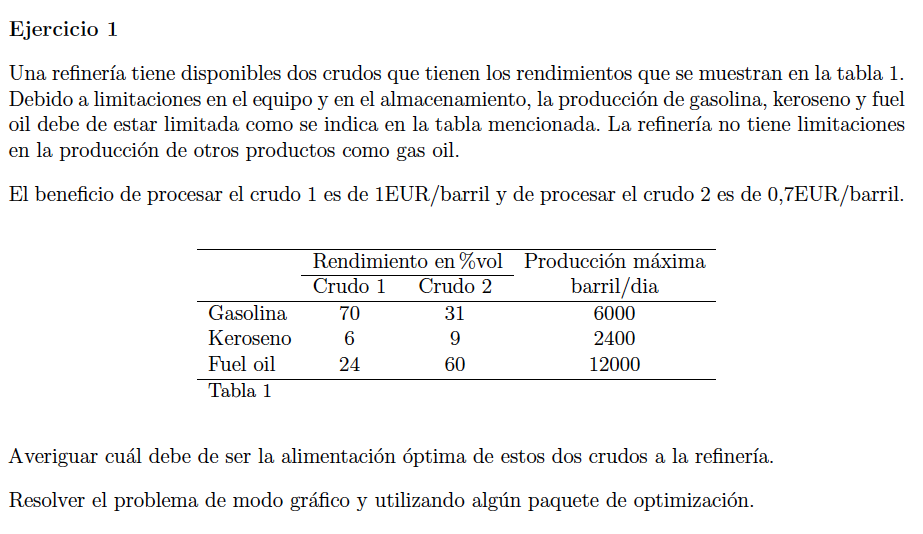

#### Planteamos el problema como un problema de LP

$$
\begin{align}
	&\text{max }  && V_1+0.7V_2 &&\\
	&\text{s.t. }  && \\
	&\text{Gasolina }  && 0.7V_1+0.31V_2 \le  6000\\
    &\text{Keroseno }  && 0.06V_1+0.09V_2 \le 2400 \\
    &\text{Fuel oil } && 0.24V_1+0.6V_2 \le 12000 \\
    & && V_1,V_2 \geq  0  \\
\end{align}
$$

#### Importamos Pyomo

In [68]:
from pyomo.environ import *

#### Creamos un problema concreto, es decir, un objeto de la clase problema que ya contenga parámetros

In [69]:
model = ConcreteModel()

#### Definimos las variables como no negativas

In [70]:
model.V1 = Var(domain=NonNegativeReals)
model.V2 = Var(domain=NonNegativeReals)

#### Definimos la función objetivo

In [71]:
model.profit = Objective(expr = model.V1 + 0.7*model.V2, sense=maximize)

#### Definimos la restricciones

In [72]:
model.Gasolina = Constraint(expr = 0.7*model.V1+0.31*model.V2 <= 6000)
model.Keroseno= Constraint(expr = 0.06*model.V1+0.09*model.V2 <= 2400)
model.FuelOil = Constraint(expr = 0.24*model.V1+0.6*model.V2 <= 12000)

In [89]:
# Create a 'dual' suffix component on the instance
# so the solver plugin will know which suffixes to collect
model.dual = Suffix(direction=Suffix.IMPORT_EXPORT)
model.rc = Suffix(direction=Suffix.IMPORT)

results = SolverFactory('glpk').solve(model).write()
model.pprint()
#results.write()
#model.display()
    

    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
    'pyomo.core.base.suffix.Suffix'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.suffix.Suffix'>). This is usually indicative
    of a modelling error. To avoid this warning, use block.del_component() and
    block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 13548.3870967742
  Upper bound: 13548.3870967742
  Number of objectives: 1
  Number of constraints: 4
  Numb

In [85]:
print(model.dual[model.Gasolina])

2.25806451612903


In [86]:
print(model.rc[model.V1])

-0.580645161290323


In [87]:
# display all duals
print ("Duals")
for c in model.component_objects(Constraint, active=True):
    print ("   Constraint",c)
    for index in c:
        print ("      ", index, model.dual[c[index]])


Duals
   Constraint Gasolina
       None 2.25806451612903
   Constraint Keroseno
       None 0.0
   Constraint FuelOil
       None 0.0


In [88]:
# display all reduced costs
print ("Reduced costs")
for c in model.component_objects(Var):
    print ("   Constraint",c)
    for index in c:
        print ("      ", index, model.rc[c[index]])

Reduced costs
   Constraint V1
       None -0.580645161290323
   Constraint V2
       None 0.0
